# Baseball Case Study

# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_baseball=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df_baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df_baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Rearranging Columns
Lets rearrange the column and push the Column W (Win) at end.

In [4]:
df = df_baseball[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E','W']]
df.head(30)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88,93
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78


In [5]:
df.shape

(30, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       30 non-null     int64  
 1   AB      30 non-null     int64  
 2   H       30 non-null     int64  
 3   2B      30 non-null     int64  
 4   3B      30 non-null     int64  
 5   HR      30 non-null     int64  
 6   BB      30 non-null     int64  
 7   SO      30 non-null     int64  
 8   SB      30 non-null     int64  
 9   RA      30 non-null     int64  
 10  ER      30 non-null     int64  
 11  ERA     30 non-null     float64
 12  CG      30 non-null     int64  
 13  SHO     30 non-null     int64  
 14  SV      30 non-null     int64  
 15  E       30 non-null     int64  
 16  W       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There seems to be no need to convert the data as there is no data with Object Datatype

In [7]:
df.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work

R – Runs scored: number of times a player crosses home plate

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
    
H – Hit: reaching base because of a batted, fair ball without error by the defense
    
2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
    
HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
    
BA – Batting average (also abbreviated AVG): hits divided by at bats (H/AB)

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
    
SO – Plate appearances per strikeout: number of times a batter strikes out to their plate appearance

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

RA – Run average: number of runs allowed times nine divided by innings pitched

ER – Earned run: number of runs that did not occur as a result of errors or passed balls
    
ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
    
CG – Complete game: number of games where player was the only pitcher for their team

SHO – Shutout: number of complete games pitched with no runs allowed

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
    
E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [8]:
df.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
W      0
dtype: int64

No records are empty, we are good to go

# Check for Duplicates

In [9]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W


No duplicate rows are found

# HeatMap

<AxesSubplot:>

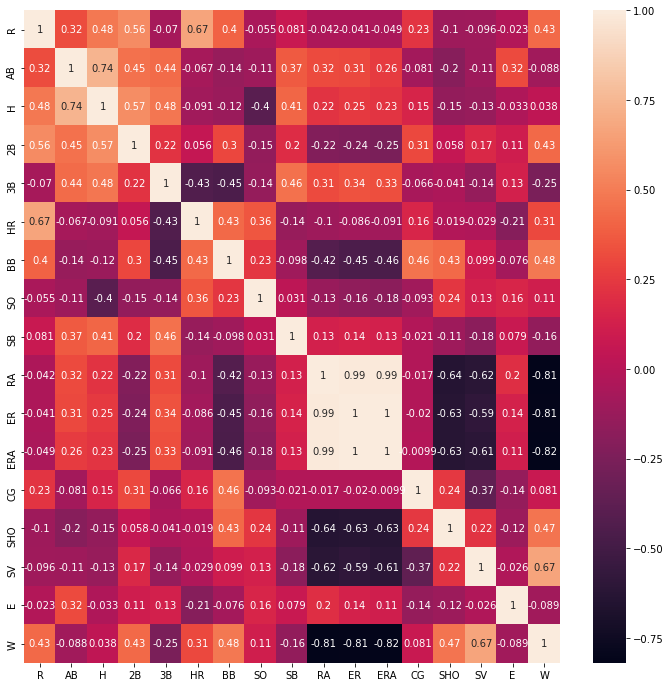

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

W (Win) is positively related to SV (Save) and negatively related to RA,ER and ERA respectively, It has some positive relations with SHO and BB also

R (Runs Scored) has some positive correlation with Win ,2B(doubles) and H (Hit) but high correlation with HR(Home runs)
    
AB(At Bat) has positive correlation with H(Hit)

3B(Triple) has some positive relation with H(Hit)

ER(Earned Run), ERA(Earned Run Average) and RA(Run Average) are strongly positively correlated


Let's visualize the correlation of each column in a tabular format with the values

In [11]:
df.corr()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
R,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.430751
AB,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.087947
H,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.037612
2B,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.427797
3B,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
HR,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.307407
BB,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.484342
SO,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.111850
SB,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
RA,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996,-0.812952


# Skewness

In [12]:
#Check Data Skewness
skew_df=pd.DataFrame({'Skewness':df.skew()}) 
skew_df

,Skewness
R,1.200786
AB,0.183437
H,0.670254
2B,-0.230650
3B,0.129502
HR,0.516441
BB,0.158498
SO,-0.156065
SB,0.479893
RA,0.045734


In [13]:
print("Out of",len(df.skew()),"features",len(df.skew().loc[abs(df.skew())>0.5]) ,"are skewed")

Out of 17 features 7 are skewed


In [14]:
skewed_feature=skew_df.iloc[(np.where(abs(skew_df['Skewness'])>0.5))]
skewed_feature

,Skewness
R,1.200786
H,0.670254
HR,0.516441
CG,0.736845
SHO,0.565790
SV,0.657524
E,0.890132


In [15]:
dataToPlot=df.loc[:, df.columns != 'W']
dataToPlot.head(2)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


In [16]:
targetToPlot=df.loc[:, df.columns == 'W']

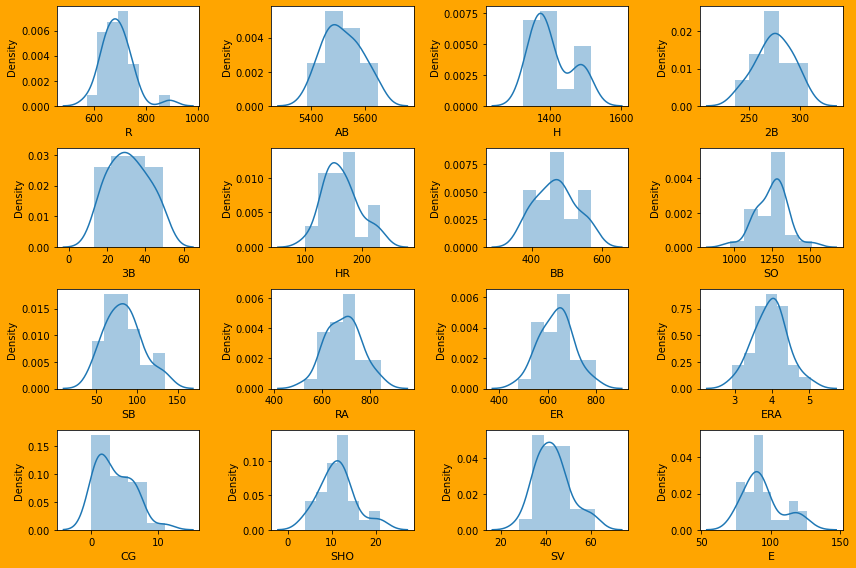

In [17]:
#Lets see data distribution using distplot
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=16:
        ax=plt.subplot(4,4,graph)        
        sns.distplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

R is right skewed and is not normally distributed.

AB is skewed a bit right and is not normally distributed

H is skewed a bit right and is not normally distributed

2B,SO,CG,SHO is skewed left and is not normally distributed

3B,HR,BB,SV is a bit right skewed and is normally distributed.

SB is not normally distributed and is right skewed

RA,ER,ERA,E is also somewhat right skewed



# Log1P Transformation to deal with Skewness

In [18]:
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.square(df[index])
print(df.skew())
print("Out of",len(df.skew()),"features",len(df.skew().loc[abs(df.skew())>0.5]) ,"are skewed but improved skewness value than previous skewness values")

R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR    -0.009528
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.093545
SV     0.163057
E      0.632916
W      0.047089
dtype: float64
Out of 17 features 3 are skewed but improved skewness value than previous skewness values


# Outliers
Lets Plot the Boxplot to deal with the Outliers

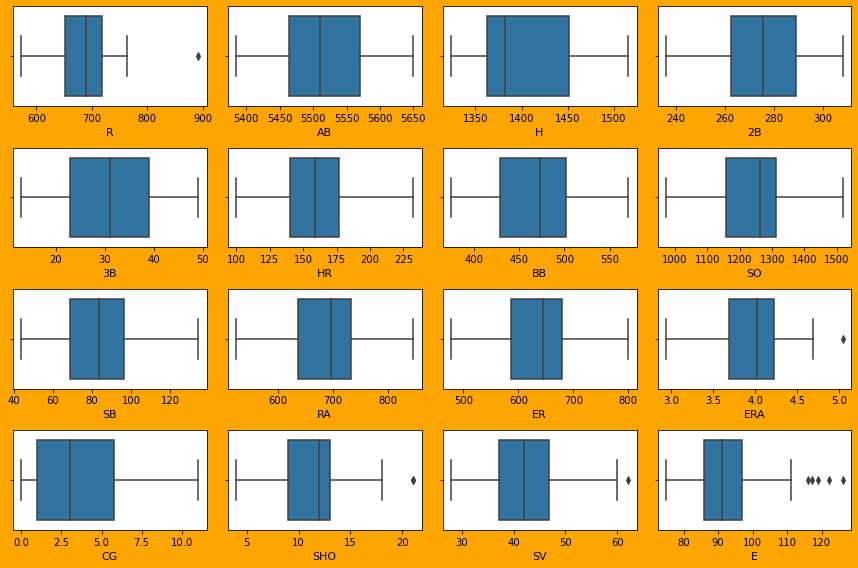

In [19]:
#Lets see data distribution
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=16:
        ax=plt.subplot(4,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

We see that E(Errors) has few outliers, lets deal with this using ZScore method, SHO also has very few outliers and seems like H has one outlier

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(30, 17)

In [21]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [22]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


In [23]:
loss_percentage= ((30-29)/30)*100
loss_percentage

3.3333333333333335

# Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_new)
#df=pd.DataFrame(x,columns=df_new.columns)

In [25]:
X_vif=df_new
X_vif.shape

(29, 17)

In [26]:
x.shape[1]

17

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,14.973211,R
1,20.465048,AB
2,9.850065,H
3,4.046343,2B
4,3.039342,3B
5,10.159290,HR
6,3.588432,BB
7,2.805670,SO
8,2.039066,SB
9,209.732465,RA


There seems to be high multicollinearity issue in ERA,ER and RA, to deal with this we will use various Regression models that suffers from multicollinearity.

Also, we can delete both column ERA and ER from the Dataframe to avoid multicollinearity

Ridge and Lasso helps us in dealing with the same

In [28]:
df=pd.DataFrame(x,columns=df_new.columns)
df.head(2)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,0.952719,0.830084,1.723726,1.556538,1.010845,-0.734567,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.240415,-0.784917,1.554812,-0.435733,1.416025
1,0.356659,-0.702831,-0.949846,0.201171,1.208917,-0.095232,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.240415,0.255799,0.296229,-0.598110,0.239947


In [29]:
df.shape

(29, 17)

In [30]:
df.drop(columns=['ERA','ER'],axis=1,inplace=True)

In [31]:
df.shape

(29, 15)

# Check Multicollinearity Again

In [32]:
x=sc.fit_transform(df)

In [33]:
X_vif=df
print(X_vif.shape)
print(x.shape)

(29, 15)
(29, 15)


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,10.987759,R
1,5.002010,AB
2,7.477631,H
3,3.469891,2B
4,2.837146,3B
5,7.269146,HR
6,3.036164,BB
7,2.389317,SO
8,1.815802,SB
9,9.524623,RA


We see that there is a drastic decrease in the multicollinearity of RA(Runs Avaerage) column, so our approach to delete the columns was successful to deal with multicollinearity and we will proceed with features and target selection and then train and test the model and then apply various regression techniques to get the best r2 score for our model

In [35]:
features=df.drop(['W'], axis=1)
target=df[['W']]

In [36]:
print((features.shape),(target.shape))

(29, 14) (29, 1)


# Feature Importance

In [37]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
feature_rf = RandomForestRegressor()
feature_rf.fit(features,target)

RandomForestRegressor()

In [38]:
print(feature_rf.feature_importances_)

[0.07686633 0.01100125 0.01475349 0.02238537 0.01289395 0.03857341
 0.02064388 0.01098728 0.01589436 0.45311757 0.00671015 0.01928628
 0.27583609 0.0210506 ]


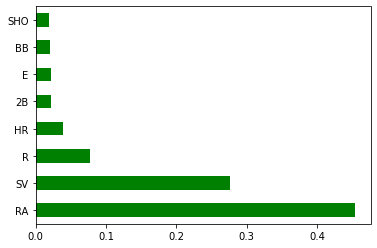

In [39]:
#plot graph of feature importances for better visualization
featureImportance = pd.Series(feature_rf.feature_importances_, index=features.columns)
featureImportance.nlargest(8).plot(kind='barh',color="green")
plt.show()

RA is the modt important feature followed by SV,R,SHO,HR,BB,2B and SO

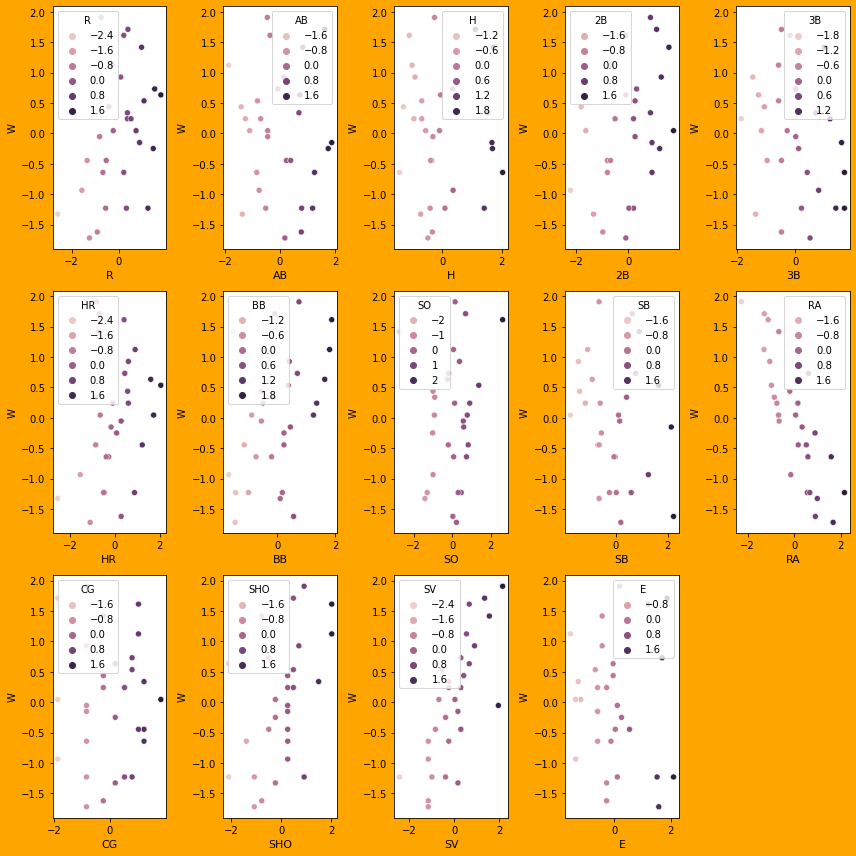

In [40]:
#Lets see data distribution using scatterplot
plt.figure(figsize=(12,12),facecolor='orange')
graph=1

for column in features:
    
    if graph<=14:
        ax=plt.subplot(3,5,graph)
        sns.scatterplot(y='W',x=features[column],hue=features[column],data=df)
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

From the avove graph it is cleaer that feature SV(Save) is the strongest feature and it is directly correlated to W(Win)


# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Linear Regression

In [42]:
lr=LinearRegression()
max_r2_score=0
for i in range(25,101):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2=r2_score(y_test,pred_test)
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 25 r2_score is:  0.27457853879119243
******************************
At 26 r2_score is:  -0.4341527051711469
******************************
At 27 r2_score is:  0.6576058225982975
******************************
At 28 r2_score is:  0.4209705031754243
******************************
At 29 r2_score is:  0.8227740387253168
******************************
At 30 r2_score is:  0.7680868057090664
******************************
At 31 r2_score is:  0.05385304370576094
******************************
At 32 r2_score is:  0.10830453795444206
******************************
At 33 r2_score is:  0.46266308033816494
******************************
At 34 r2_score is:  0.17176369809091052
******************************
At 35 r2_score is:  0.7434285087794794
******************************
At 36 r2_score is:  0.05280003799952404
******************************
At 37 r2_score is:  0.2932566507605615
******************************
At 38 r2_score is:  0.4228488466055623
*************

In [43]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 47)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
r2_final_score=r2_score(y_test,pred_test)

In [44]:
from sklearn import metrics
# calculate MAE, MSE, RMSE on Train Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

mean_absolute_error : 0.23908588134592498
mean_squared_error :  0.08211396343167636
root_mean_squared_error :  0.28655534095821067


In [45]:
# calculate MAE, MSE, RMSE on Test Data
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, pred_test))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, pred_test))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

mean_absolute_error : 0.17084050305092371
mean_squared_error :  0.04614863049434517
root_mean_squared_error :  0.2148223230819953


# Cross Validation of Linear Regression model

In [46]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute

In [47]:
cv = LeaveOneOut()

In [48]:
#use LOOCV to evaluate model
scores = cross_val_score(lr,features,target, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
lrcv_score=mean(absolute(scores))
lrcv_score

0.4371083854671673

In [49]:
lr_data = {'Model': ['Linear Regression'], 
           'MAE': metrics.mean_absolute_error(y_test, pred_test),'MSE':metrics.mean_squared_error(y_test, pred_test),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
           'R2 Score': r2_final_score,
           'CV Score': lrcv_score
          }

df_LR = pd.DataFrame(lr_data)
df_LR

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Linear Regression,0.170841,0.046149,0.214822,0.961936,0.437108


# Regularization Techniques
Once we use linear regression on a data-set divided in to training and test set, calculating the scores on training and test set can give us a rough idea about whether the model is suffering from over-fitting or under-fitting.

If we have very few features on a data-set and the score is poor for both training and test set then it’s a problem of under-fitting. On the other hand if we have large number of features and test score is relatively poor than the training score then it’s the problem of over-fitting.

Regularization is a simple technique to reduce model complexity and prevent over-fitting which may result from simple linear regression.

# Ridge

In [50]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.1,max_iter=20, normalize=True)

max_r2_score=0
for i in range(25,101):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = i)
    ridgeReg.fit(x_train,y_train)
    ridge_pred_train=ridgeReg.predict(x_train)
    ridge_pred=ridgeReg.predict(x_test)
    r2=r2_score(y_test,ridge_pred)
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 25 r2_score is:  0.5779317746187891
******************************
At 26 r2_score is:  0.707536007042787
******************************
At 27 r2_score is:  0.6029565780474822
******************************
At 28 r2_score is:  0.648491967784645
******************************
At 29 r2_score is:  0.7344172398872151
******************************
At 30 r2_score is:  0.8019037394613278
******************************
At 31 r2_score is:  -0.30507240667755076
******************************
At 32 r2_score is:  0.5058259146826529
******************************
At 33 r2_score is:  0.4973536843484433
******************************
At 34 r2_score is:  0.4084712782938489
******************************
At 35 r2_score is:  0.7587634217668436
******************************
At 36 r2_score is:  -0.0440939297185432
******************************
At 37 r2_score is:  0.06540033962956437
******************************
At 38 r2_score is:  0.47800525223076673
*****************

In [51]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 75)
ridgeReg.fit(x_train,y_train)
ridge_pred = ridgeReg.predict(x_test)
ridge_pred_train = ridgeReg.predict(x_train)
r2_final_score=r2_score(y_test,ridge_pred)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=0.1,fit_intercept=True,normalize=True,solver='auto'))
#
# Pass instance of pipeline and training and test data set
# cv=2 represents the StratifiedKFold with 2 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=2, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
ridge_cvScore=(np.mean(scores))
ridge_cvScore

Cross Validation accuracy: 0.661 +/- 0.019


0.6614514638432005

In [53]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, ridge_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, ridge_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("Cross Validation Score : ",ridge_cvScore)

r2_score 0.9211935332456608
mean_absolute_error : 0.2669163001276642
mean_squared_error :  0.10229449993243765
root_mean_squared_error :  0.3198351136639591
Cross Validation Score :  0.6614514638432005


In [54]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, ridge_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, ridge_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, ridge_pred_train)))
print ("Cross Validation Score : ", ridge_cvScore)

r2_score 0.9211935332456608
mean_absolute_error : 0.2514219315611827
mean_squared_error :  0.0936406997084446
root_mean_squared_error :  0.30600767916580884
Cross Validation Score :  0.6614514638432005


In [55]:
ridge_data = {'Model': ['Ridge'], 
           'MAE': metrics.mean_absolute_error(y_test, ridge_pred),'MSE':metrics.mean_squared_error(y_test, ridge_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)),
           'R2 Score': r2_final_score,
           'CV Score': ridge_cvScore
             }  

df_Ridge = pd.DataFrame(ridge_data)  
df_Ridge

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Ridge,0.266916,0.102294,0.319835,0.921194,0.661451


# Lasso

In [56]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.1,max_iter=20, normalize=True)

max_r2_score=0
for i in range(25,101):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = i)
    lassoReg.fit(x_train,y_train)
    lassoReg_pred_train=lassoReg.predict(x_train)
    lassoReg_pred=lassoReg.predict(x_test)
    r2=r2_score(y_test,lassoReg_pred)
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 25 r2_score is:  -0.00873742425161872
******************************
At 26 r2_score is:  0.25913280885167445
******************************
At 27 r2_score is:  0.2802119731913455
******************************
At 28 r2_score is:  0.5156236236574558
******************************
At 29 r2_score is:  0.269454502448641
******************************
At 30 r2_score is:  0.3532536992566754
******************************
At 31 r2_score is:  -0.8143718530854958
******************************
At 32 r2_score is:  0.24006224013350275
******************************
At 33 r2_score is:  -0.04493712742364209
******************************
At 34 r2_score is:  0.4572511194487595
******************************
At 35 r2_score is:  0.4863422763091094
******************************
At 36 r2_score is:  -1.1369938352902254
******************************
At 37 r2_score is:  -0.09378455637958782
******************************
At 38 r2_score is:  0.2303485762564217
***********

In [62]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 46)
lassoReg.fit(x_train,y_train)
lassoReg_pred = lassoReg.predict(x_test)
lassoReg_pred_train = lassoReg.predict(x_train)
r2_final_score=r2_score(y_test,lassoReg_pred)

In [66]:
pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1,fit_intercept=True,normalize=True))
#
# Pass instance of pipeline and training and test data set
# cv=2 represents the StratifiedKFold with 2 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=2, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
lasso_cvScore=(np.mean(scores))
lasso_cvScore

Cross Validation accuracy: 0.611 +/- 0.005


0.6111999256113998

In [67]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, lassoReg_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, lassoReg_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, lassoReg_pred)))
print("Cross Validation Score : ",lasso_cvScore)

r2_score 0.7029920341225431
mean_absolute_error : 0.38984372579012017
mean_squared_error :  0.17346882686323242
root_mean_squared_error :  0.4164958905718428
Cross Validation Score :  0.6111999256113998


In [68]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, lassoReg_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, lassoReg_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, lassoReg_pred_train)))
print ("Cross Validation Score : ", lasso_cvScore)

r2_score 0.7029920341225431
mean_absolute_error : 0.6047039686074072
mean_squared_error :  0.5475181429730995
root_mean_squared_error :  0.7399446891309509
Cross Validation Score :  0.6111999256113998


In [69]:
lasso_data = {'Model': ['Lasso'], 
           'MAE': metrics.mean_absolute_error(y_test, lassoReg_pred),'MSE':metrics.mean_squared_error(y_test, lassoReg_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, lassoReg_pred)),
           'R2 Score': r2_final_score,
           'CV Score': lasso_cvScore}  

df_Lasso = pd.DataFrame(lasso_data)  
df_Lasso

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Lasso,0.389844,0.173469,0.416496,0.702992,0.6112


# KNeighborsRegressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

max_r2_score=0
for i in range(25,101):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = i)
    knn.fit(x_train,y_train)
    
    knn_pred_train=knn.predict(x_train)
    knn_pred=knn.predict(x_test)
    
    r2=r2_score(y_test,knn_pred)
    
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 25 r2_score is:  0.09127272727272706
******************************
At 26 r2_score is:  0.04103941100043296
******************************
At 27 r2_score is:  0.40351274787535407
******************************
At 28 r2_score is:  0.5472568940493467
******************************
At 29 r2_score is:  0.5521771913289351
******************************
At 30 r2_score is:  0.5181380915438325
******************************
At 31 r2_score is:  -0.9467269643866592
******************************
At 32 r2_score is:  0.2365542168674699
******************************
At 33 r2_score is:  0.26851108764519527
******************************
At 34 r2_score is:  0.4278416347381865
******************************
At 35 r2_score is:  0.67291696238467
******************************
At 36 r2_score is:  -0.8726187245590227
******************************
At 37 r2_score is:  -0.21698461538461555
******************************
At 38 r2_score is:  0.1504335664335661
**************

In [71]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 61)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
r2_final_score=r2_score(y_test,knn_pred)

In [72]:
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=3,weights='uniform',algorithm='kd_tree',leaf_size=3))
#
# Pass instance of pipeline and training and test data set
# cv=2 represents the StratifiedKFold with 2 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=4, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
knn_cvScore=(np.mean(scores))
knn_cvScore

Cross Validation accuracy: 0.516 +/- 0.116


0.5159663025068801

In [73]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, knn_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, knn_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))
print("Cross Validation Score : ",knn_cvScore)

r2_score 0.7670606293169608
mean_absolute_error : 0.36589106949982003
mean_squared_error :  0.24294957893614755
root_mean_squared_error :  0.49289915696433034
Cross Validation Score :  0.5159663025068801


In [74]:
#Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, knn_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, knn_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, knn_pred_train)))
print("Cross Validation Score : ",knn_cvScore)

r2_score 0.7670606293169608
mean_absolute_error : 0.49685052838135507
mean_squared_error :  0.33685303517550014
root_mean_squared_error :  0.5803904161644127
Cross Validation Score :  0.5159663025068801


In [75]:
knn_data = {'Model': ['KNN'], 
           'MAE': metrics.mean_absolute_error(y_test, knn_pred),'MSE':metrics.mean_squared_error(y_test, knn_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, knn_pred)),
           'R2 Score': r2_final_score,
           'CV Score': knn_cvScore
           }  

df_knn = pd.DataFrame(knn_data)  
df_knn

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,KNN,0.365891,0.24295,0.492899,0.767061,0.515966


# Random Forest Regressor

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf=RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=100,bootstrap=True)
max_r2_score=0
for i in range(25,101):
    x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = i)
    rf.fit(x_train,y_train)
    rf_pred_train=rf.predict(x_train)
    rf_pred=rf.predict(x_test)
    r2=r2_score(y_test,rf_pred)
    print("*"*30)
    print("At",i,"r2_score is: ",r2)
    if r2>max_r2_score:
        max_r2_score=r2
        final_i=i
print("*"*30)
print("Best r2_score at ",final_i," is : ",max_r2_score)

******************************
At 25 r2_score is:  0.015781818181817453
******************************
At 26 r2_score is:  0.33674872239064524
******************************
At 27 r2_score is:  0.15312426817752578
******************************
At 28 r2_score is:  0.6015706095791002
******************************
At 29 r2_score is:  0.5325516493873705
******************************
At 30 r2_score is:  0.6132192397207138
******************************
At 31 r2_score is:  -0.6554878462408138
******************************
At 32 r2_score is:  0.30540981927710853
******************************
At 33 r2_score is:  0.5783495248152057
******************************
At 34 r2_score is:  0.45583295019157044
******************************
At 35 r2_score is:  0.6341386089425124
******************************
At 36 r2_score is:  -0.3899775440976929
******************************
At 37 r2_score is:  -0.27324726153846224
******************************
At 38 r2_score is:  0.42919720279720275
*********

In [78]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state = 46)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_pred_train = rf.predict(x_train)
r2_final_score=r2_score(y_test,rf_pred)

In [83]:
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(criterion="mae",max_features="auto",n_estimators=100,bootstrap=True,min_samples_split=3) )
#
# Pass instance of pipeline and training and test data set
# cv=2 represents the StratifiedKFold with 2 folds
#
scores = cross_val_score(pipeline, X=x_train, y=y_train, cv=2, n_jobs=1) 

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
rfr_cvScore=(np.mean(scores))
rfr_cvScore

Cross Validation accuracy: 0.548 +/- 0.047


0.54840715018207

In [84]:
#Test Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, rf_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, rf_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
print("Cross Validation Score : ",rfr_cvScore)

r2_score 0.8483759707629053
mean_absolute_error : 0.23635909712778547
mean_squared_error :  0.08855669038482049
root_mean_squared_error :  0.29758476168113934
Cross Validation Score :  0.54840715018207


In [85]:
# Train Data
print("r2_score",r2_final_score)
print ("mean_absolute_error :",metrics.mean_absolute_error(y_train, rf_pred_train))
print ("mean_squared_error : ",metrics.mean_squared_error(y_train, rf_pred_train))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_train, rf_pred_train)))
print ("Cross Validation Score : ", rfr_cvScore)

r2_score 0.8483759707629053
mean_absolute_error : 0.2123759033835909
mean_squared_error :  0.0662852937846485
root_mean_squared_error :  0.25745930510402704
Cross Validation Score :  0.54840715018207


In [86]:
randomForest_data = {'Model': ['Random Forest'], 
           'MAE': metrics.mean_absolute_error(y_test, rf_pred),'MSE':metrics.mean_squared_error(y_test, rf_pred),
           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, rf_pred)),
           'R2 Score': r2_score(y_test,rf_pred),
           'CV Score': rfr_cvScore
            }  

df_RF = pd.DataFrame(randomForest_data)  
df_RF

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Random Forest,0.236359,0.088557,0.297585,0.848376,0.548407


In [87]:
modelDF=pd.concat([df_LR,df_Ridge,df_Lasso,df_knn,df_RF]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,MAE,MSE,RMSE,R2 Score,CV Score
0,Linear Regression,0.170841,0.046149,0.214822,0.961936,0.437108
1,Ridge,0.266916,0.102294,0.319835,0.921194,0.661451
2,Lasso,0.389844,0.173469,0.416496,0.702992,0.611200
3,KNN,0.365891,0.242950,0.492899,0.767061,0.515966
4,Random Forest,0.236359,0.088557,0.297585,0.848376,0.548407


The best model is Lasso as it has the minimum difference of R2 score and CV Score 0.091792, So we will proceed to save this model for our Problem as Lasso helps us to reduce multicollinearity we can use regularization that means to keep all the features but reducing the magnitude of the coefficients of the model.

# Save the model

In [88]:
from joblib import dump , load
dump(lassoReg,'Baseball.joblib')
lassoReg_load=load('Baseball.joblib')

In [89]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'Baseball.joblib')

In [90]:
import joblib
joblib.dump(lassoReg, filename) 

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmpx9xjodtz\\Baseball.joblib']

In [91]:
joblib.load(filename)

Lasso(alpha=0.1, max_iter=20, normalize=True)